In [8]:
library(xlsx)
library(fpp2, quietly=TRUE)
library(ggplot2, quietly=TRUE)
#library(lubridate, quietly=TRUE)
#library(zoo, quietly=TRUE)
library(dplyr, quietly=TRUE)
library(xts, quietly=TRUE)
library(GGally, quietly=TRUE)

'data.frame':	44 obs. of  2 variables:
 $ Tarih        : Date, format: "2017-01-01" "2017-02-01" ...
 $ TP.TUFE1YI.T1: num  285 289 292 294 295 ...


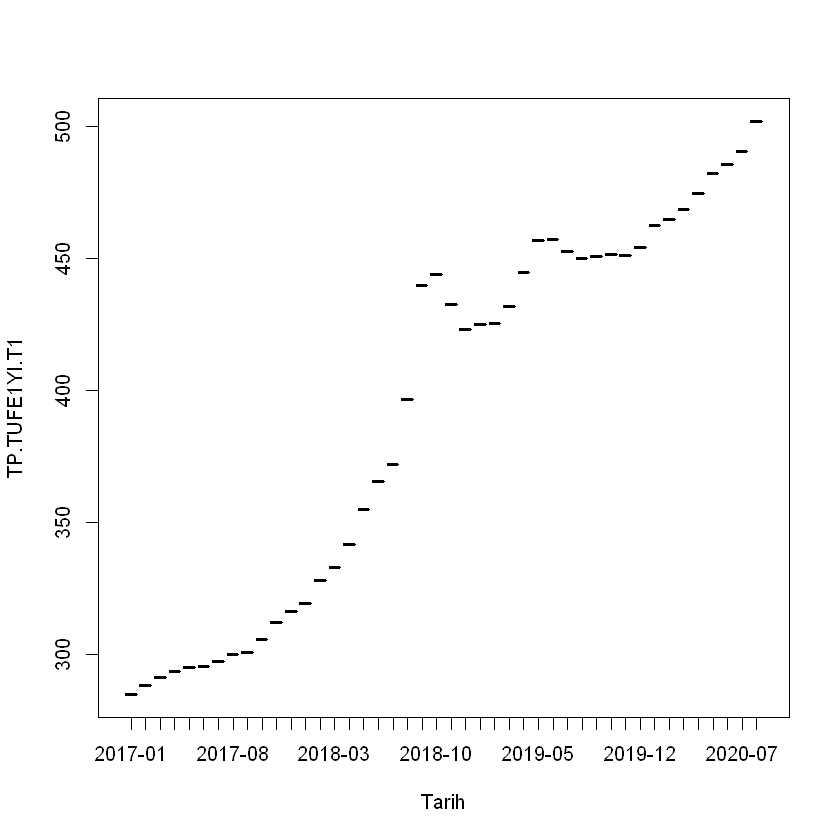

In [9]:
#Loading the datasets
price_index=read.xlsx("Price Index.xlsx",sheetIndex=1, header=TRUE)
plot(price_index)
price_index$Tarih=as.Date(as.yearmon(price_index$Tarih))
str(price_index)

'data.frame':	44 obs. of  2 variables:
 $ Tarih   : Date, format: "2017-01-01" "2017-02-01" ...
 $ TP.TIG07: num  13 12.6 11.7 10.5 10.2 10.2 10.7 10.6 10.6 10.3 ...


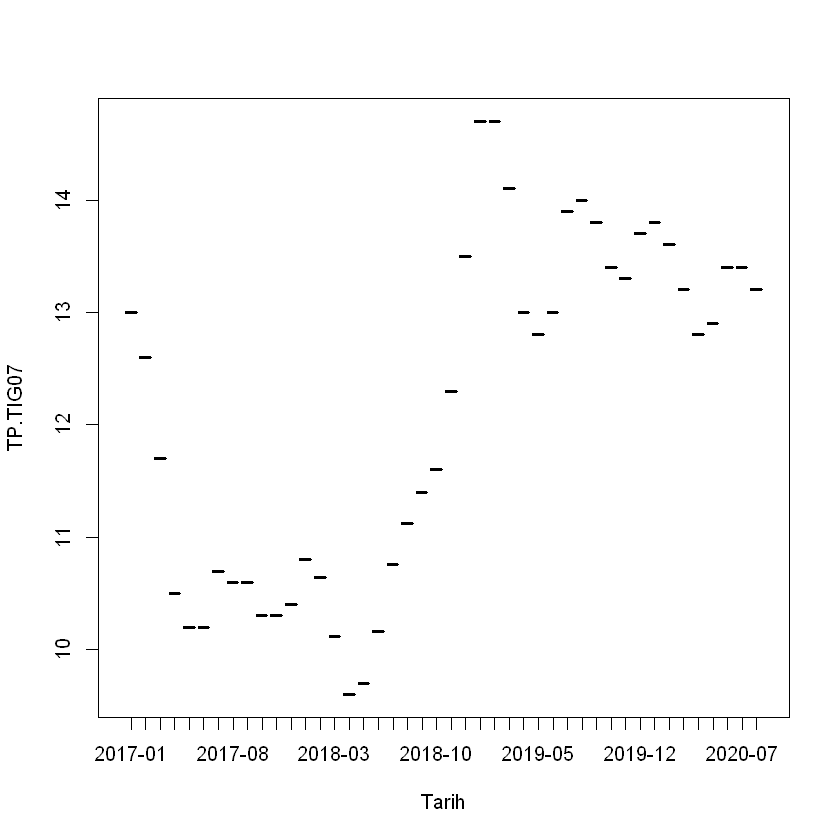

In [10]:
unemployment_rate=read.xlsx("Unemployement Rate.xlsx",sheetIndex=1, header=TRUE)
plot(unemployment_rate)
unemployment_rate$Tarih=as.Date(as.yearmon(unemployment_rate$Tarih))
str(unemployment_rate)

'data.frame':	44 obs. of  2 variables:
 $ Tarih          : Date, format: "2017-01-01" "2017-02-01" ...
 $ TP.DK.USD.S.YTL: num  3.74 3.68 3.67 3.66 3.57 ...


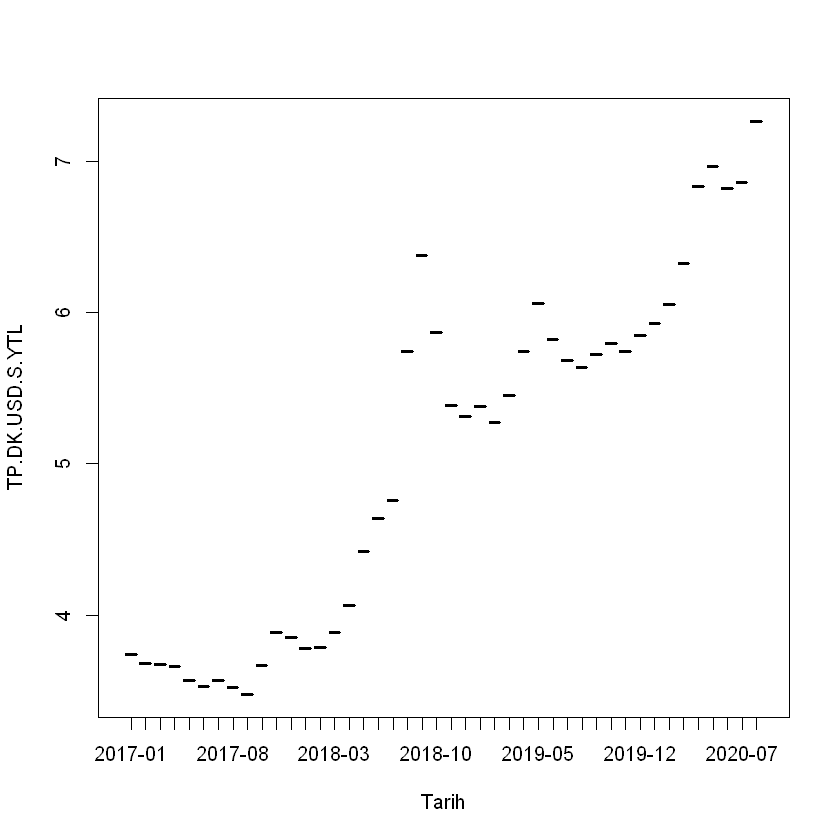

In [11]:
dolar_exchange_rate=read.xlsx("Dolar Exchange Rate.xlsx",sheetIndex = 1, header=TRUE)
plot(dolar_exchange_rate)
dolar_exchange_rate$Tarih=as.Date(as.yearmon(dolar_exchange_rate$Tarih))
str(dolar_exchange_rate)

In [28]:
sub_df<-merge(price_index,unemployment_rate,by="Tarih")
df<-merge(sub_df,dolar_exchange_rate,by="Tarih")

In [13]:
df_ts <- xts(df[,-1], order.by=as.Date(df[,1], "%Y/%m/%d"))
glimpse(df_ts)

An 'xts' object on 2017-01-01/2020-08-01 containing:
  Data: num [1:44, 1:3] 285 289 292 294 295 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:3] "TP.TUFE1YI.T1" "TP.TIG07" "TP.DK.USD.S.YTL"
  Indexed by objects of class: [Date] TZ: UTC
  xts Attributes:  
 NULL


In [27]:
colnames(df_ts)[1]<-"tufe_index"
colnames(df_ts)[2]<-"unemp_rate"
colnames(df_ts)[3]<-"dolar_rate"

In [15]:
df_ts$tufe_index_normalized=(df_ts$tufe_index-min(df_ts$tufe_index))/(max(df_ts$tufe_index)-min(df_ts$tufe_index))
df_ts$unemp_rate_normalized=(df_ts$unemp_rate-min(df_ts$unemp_rate))/(max(df_ts$unemp_rate)-min(df_ts$unemp_rate))
df_ts$dolar_rate_normalized=(df_ts$dolar_rate -min(df_ts$dolar_rate ))/(max(df_ts$dolar_rate )-min(df_ts$dolar_rate ))

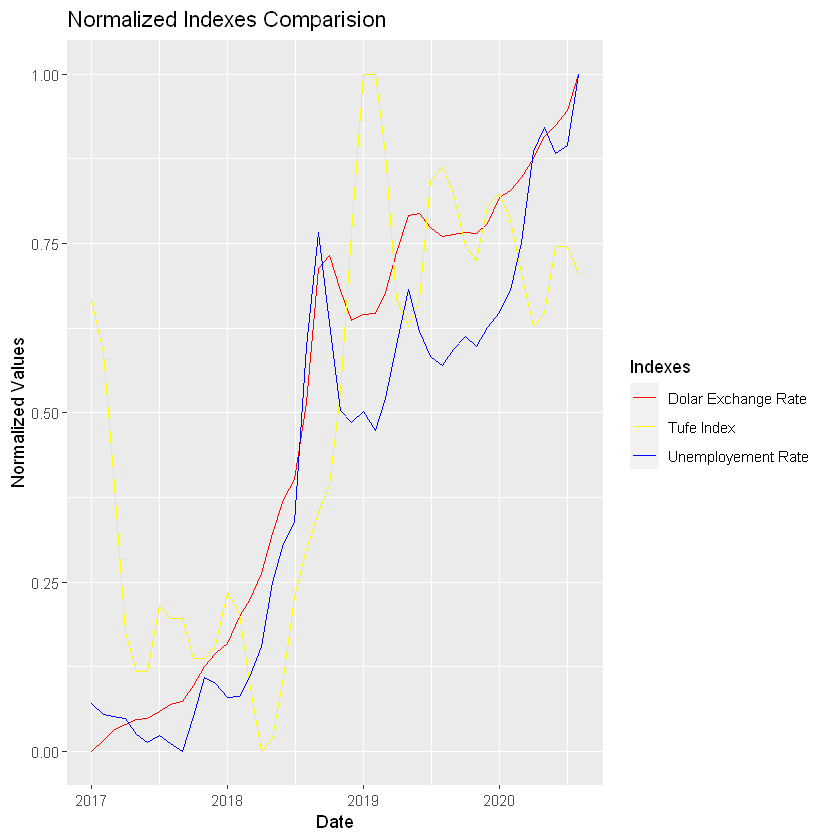

In [16]:
cols <- c("Dolar Exchange Rate" = "red", "Tufe Index" = "yellow", "Unemployement Rate" = "blue")

ggplot(df_ts)+geom_line(aes(x=Index, y=tufe_index_normalized,color="Dolar Exchange Rate"))+
  geom_line(aes(x=Index, y=unemp_rate_normalized ,color="Tufe Index"))+
  geom_line(aes(x=Index, y=dolar_rate_normalized , color= "Unemployement Rate"))+
  ggtitle("Normalized Indexes Comparision")+
  ylab("Normalized Values")+xlab("Date")+
  scale_color_manual(values = cols)+
  labs(colour = "Indexes")

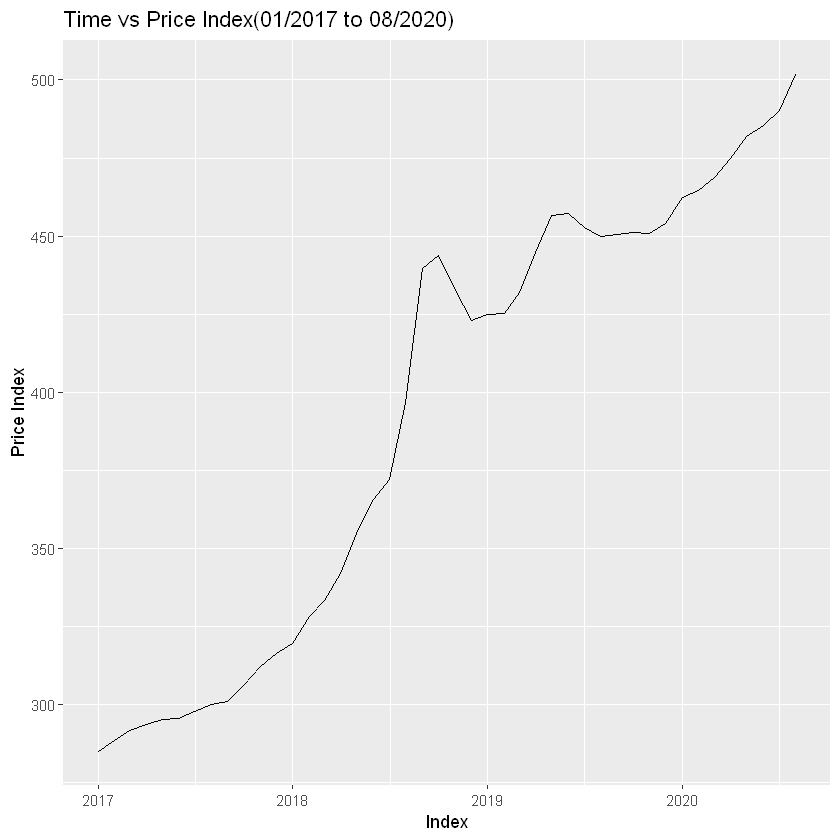

In [17]:
autoplot(df_ts[,c("tufe_index")])+ggtitle("Time vs Price Index(01/2017 to 08/2020)")+
  ylab("Price Index")

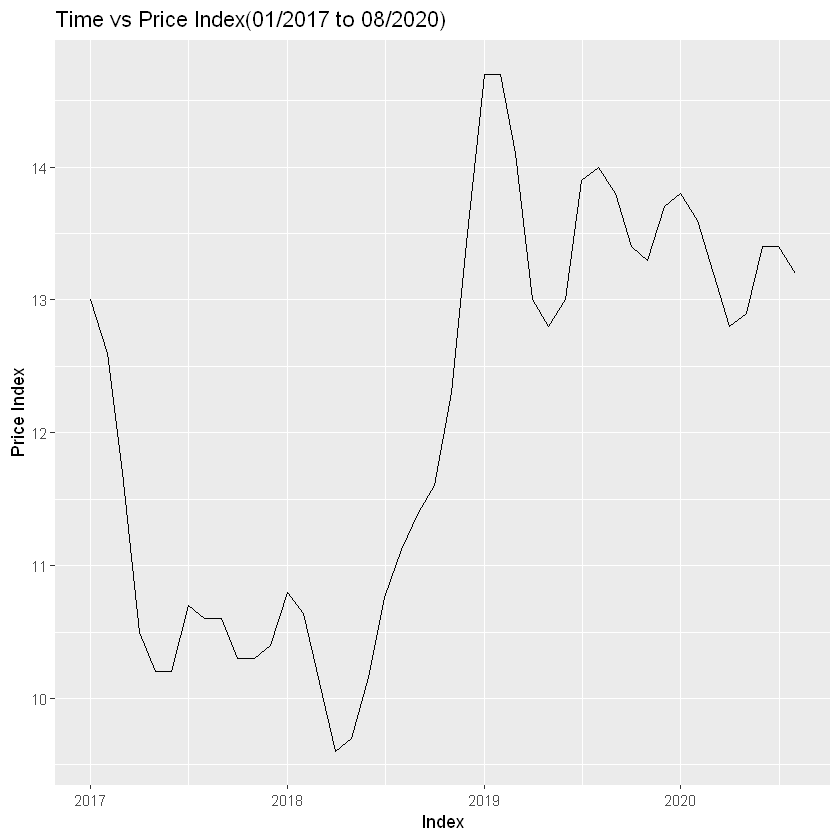

In [18]:
autoplot(df_ts[,c("unemp_rate")])+ggtitle("Time vs Price Index(01/2017 to 08/2020)")+
  ylab("Price Index")

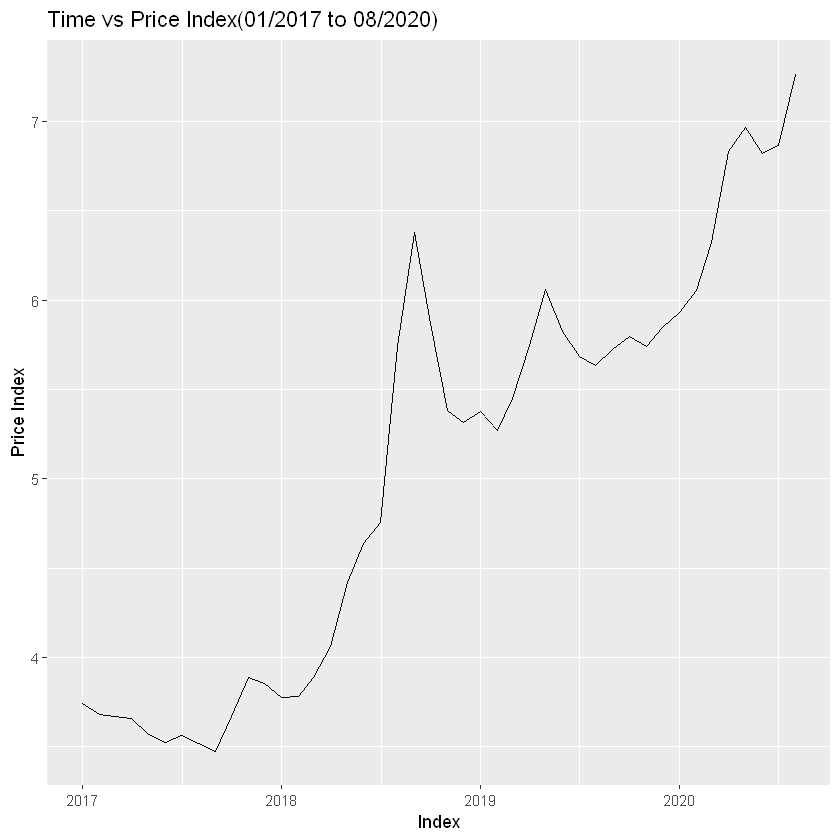

In [19]:
autoplot(df_ts[,c("dolar_rate")])+ggtitle("Time vs Price Index(01/2017 to 08/2020)")+
  ylab("Price Index")

In [24]:
df_ts_req=df_ts[,c(1,2,3)]

# General looking with 3 different graph

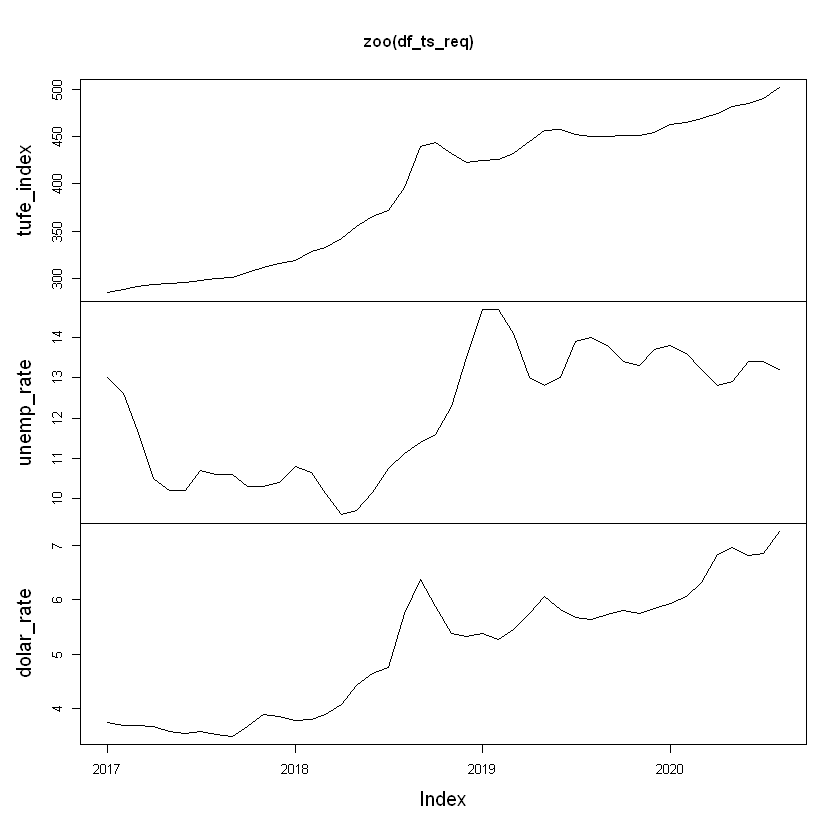

In [25]:
plot(zoo(df_ts_req))

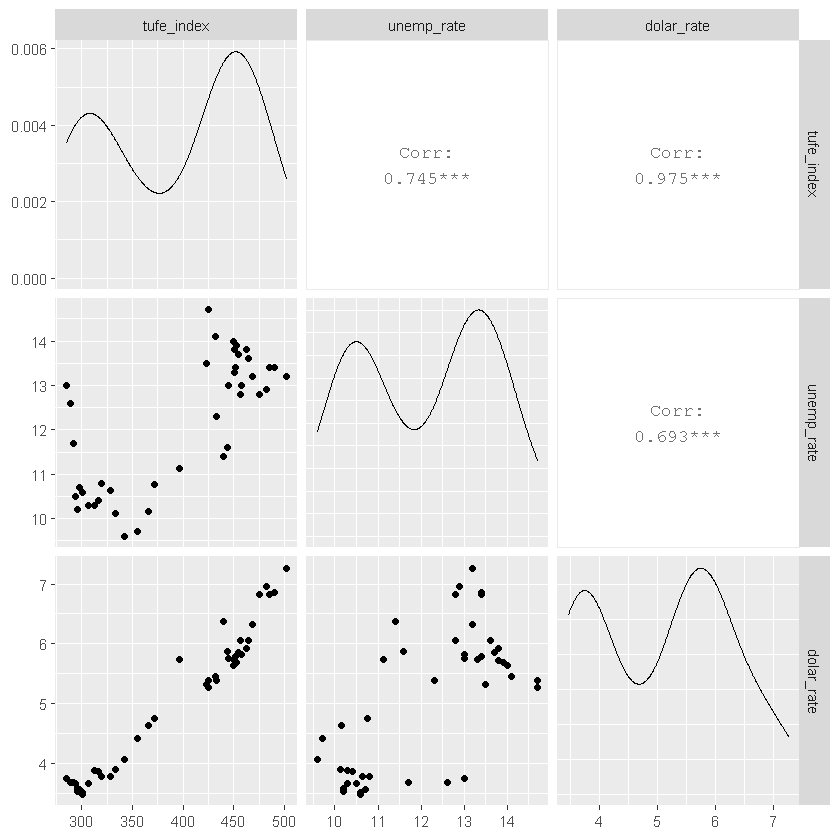

In [26]:

#Correlation between the variables
ggpairs(data.frame(df_ts_req))